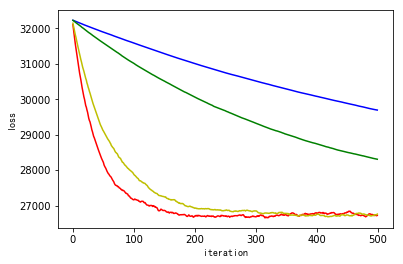

In [18]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from numpy import dot
from matplotlib import pyplot as plt
import random
import math

#参数设置
lr=1e-2
iteration=500
batchsize=400
c=1e-3
p=0.6
epsilon=1e-6
beta = 0.9

def get_data():
    data = load_svmlight_file("a9a")
    return data[0], data[1]

def split(x,y,tsize=0.2 ,rstate=33):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tsize, random_state=rstate)
    return x_train, x_test, y_train, y_test

def HingeLoss(x,y,w):
    item1 = dot(w.T,w)*0.5
    item2 = 0
    for i in range(x.shape[0]):
        item2 = item2+max(0,1-y[i]*dot(x[i],w))
    return item1+item2

def gradient(x, y, w, batchsize=100):
    grad = w
    for i in range(batchsize):
        sample = random.randint(0, batchsize - 1)
        if (((1-y[sample])*(np.dot(x[sample],w)))>=0):
            grad = grad-c*y[sample]*x[sample]
    return grad / batchsize

def NAG(x,y,w,g,v,batchsize=100):
    g = w-p*v
    g = gradient(x,y,g,batchsize)
    v = p*v+lr*g
    return v

def RMSProp(x,y,w,g,batchsize=100):
    grad = gradient(x,y,w,batchsize)
    g = p*g-(1-p)*np.square(grad)
    return lr*np.multiply(np.divide(np.ones(grad.shape[0]),np.sqrt(epsilon+g)),grad)

def AdaDelta(x,y,w,g,delta,t,batchsize=100):
    grad = gradient(x, y, w, batchsize)
    g = p * g - (1 - p) * np.square(grad)
    i = np.divide(np.sqrt(t+epsilon),np.sqrt(g+epsilon))
    delta = -np.multiply(i,grad)
    t = p*t+(1-p)*np.square(delta)
    return delta

def Adam(x,y,w,g,m,batchsize=100):
    grad = gradient(x, y, w, batchsize)
    m = beta*m+(1-beta)*grad
    g = p * g - (1 - p) * np.square(grad)
    a = lr*math.sqrt(1-p)/(1-beta)
    return a*np.divide(m,np.sqrt(g+epsilon))

x, y = get_data()
x_train, x_test, y_train, y_test = split(x,y,0.01,42)
x_train = x_train.toarray()
x_test = x_test.toarray()
y_train[y_train<0] = 0
y_test[y_test<0] = 0
w = np.zeros((123,))
numOfSample=x_train.shape[0]
numOfValidation=x_test.shape[0]
NAGloss = np.zeros(iteration)
RMSProploss = np.zeros(iteration)
AdaDeltaloss = np.zeros(iteration)
Adamloss = np.zeros(iteration)


w = np.zeros((123,))
g = np.zeros((123,))
v = np.zeros((123,))
lr=0.5
p=0.9
for i in range(iteration):
    w=w-NAG(x_train,y_train,w,g,v,batchsize)
    loss=HingeLoss(x_train,y_train,w)
    NAGloss[i]=loss

w = np.zeros((123,))
g = np.zeros((123,))
lr=1e-2
p=0.6
for i in range(iteration):
    w=w-RMSProp(x_train,y_train,w,g,batchsize)
    loss=HingeLoss(x_train,y_train,w)
    RMSProploss[i]=loss

w = np.zeros((123,))
g = np.zeros((123,))
delta = np.zeros((123,))
t = np.zeros((123,))
for i in range(iteration):
    w=w+AdaDelta(x_train,y_train,w,g,delta,t,batchsize)
    loss=HingeLoss(x_train,y_train,w)
    AdaDeltaloss[i]=loss

w = np.zeros((123,))
g = np.zeros((123,))
m = np.zeros((123,))
for i in range(iteration):
    w=w-Adam(x_train,y_train,w,g,m,batchsize)
    loss=HingeLoss(x_train,y_train,w)
    Adamloss[i]=loss

plt.plot(np.arange(iteration),NAGloss,label='NAG',color='b')
plt.plot(np.arange(iteration),RMSProploss,label='RMSProp',color='r')
plt.plot(np.arange(iteration),AdaDeltaloss,label='AdaDelta',color='g')
plt.plot(np.arange(iteration),Adamloss,label='Adam',color='y')
plt.xlabel(u"iteration", fontproperties='SimHei')
plt.ylabel(u"loss", fontproperties='SimHei')
plt.show()